<a href="https://colab.research.google.com/github/rsanchezgarc/AI-ML-analytics-IE/blob/main/notebooks/1_AI_but_not_ML/HeuristicOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heuristic optimization examples

## Discrete optimization problem
Now we will show how to solve the TSP problem using simulated annealing. Recall that the TSP problem can be framed as: 'Given a list of cities and their distances, what's the shortest possible route that visits each city exactly once and returns to the starting city?

In [4]:
%cd ../../../AI
!poetry add ipykernel numpy pandas matplotlib seaborn scipy
!poetry install
!pip install scipy
# !poetry shell

/Users/armandhubler/Library/Caches/pypoetry/virtualenvs/ai-HM8KmQxY-py3.9/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/Users/armandhubler/Library/Mobile Documents/com~apple~CloudDocs/{ IE }/{ BBA DBA }/{ Year 3 }/Semester_2/AI_ML&_Analytics/code/AI
The following packages are already present in the pyproject.toml and will be skipped:

  - ipykernel

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Using version ^2.2.1 for numpy
Using version ^2.2.3 for pandas
Using version ^3.10.0 for matplotlib
Using version ^0.13.2 for seaborn
Using version ^1.15.1 for scipy

Updating dependencies
Resolving dependencies... (0.0s)

The current project's supported Python range (>=3.9,<4.0) is not compatible with some of the required packages Python requirement:
  - scipy requires Python >=3.10, so it will not be satisfied for Python >=3.9,<3.10

Because no versions of scipy match >1.15.1,<2.0.0
 and scipy (1.15.1) requires Python >=3.10, scipy is forbidden.
So, because ai

Best tour length: 608.13


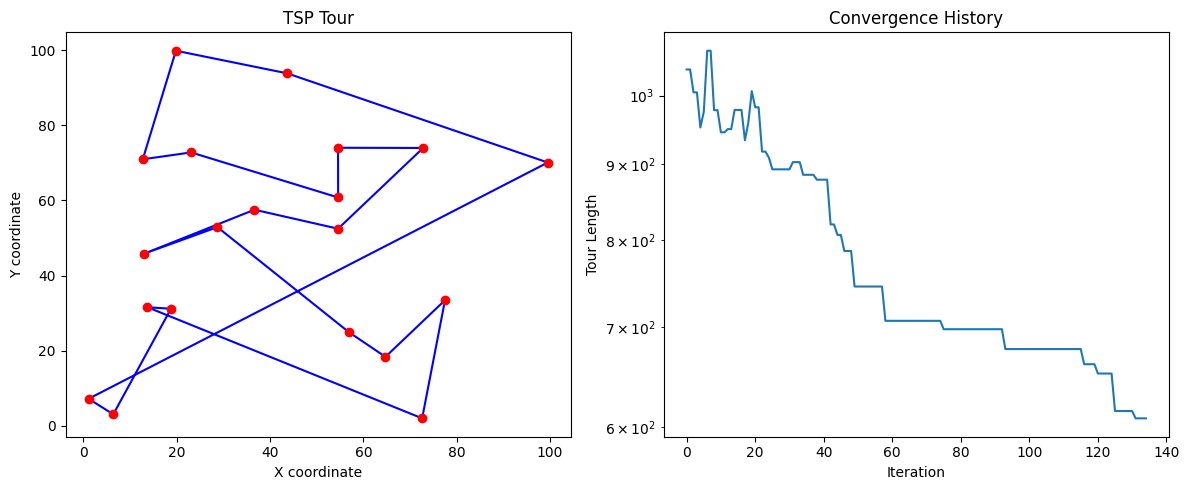

In [5]:
import numpy as np
from typing import List, Tuple
import matplotlib.pyplot as plt

class TSP:
    def __init__(self, num_cities: int):
        # Generate random cities with x,y coordinates between 0 and 100
        self.cities = np.random.rand(num_cities, 2) * 100
        self.num_cities = num_cities

        # Calculate distance matrix
        self.distances = np.zeros((num_cities, num_cities))
        for i in range(num_cities):
            for j in range(num_cities):
                self.distances[i][j] = np.sqrt(np.sum((self.cities[i] - self.cities[j])**2))

    def calculate_tour_length(self, tour: List[int]) -> float:
        """Calculate the total length of a tour"""
        length = 0
        for i in range(self.num_cities):
            length += self.distances[tour[i]][tour[(i+1) % self.num_cities]]
        return length

    def generate_neighbor(self, tour: List[int]) -> List[int]:
        """Generate a neighbor solution by swapping two random cities"""
        new_tour = tour.copy()
        i, j = np.random.randint(0, self.num_cities, 2)
        new_tour[i], new_tour[j] = new_tour[j], new_tour[i]
        return new_tour

    def solve_with_simulated_annealing(self) -> Tuple[List[int], float]:
        # Parameters
        initial_temp = 100
        final_temp = 0.1
        alpha = 0.95  # cooling rate

        # Initialize with a random tour
        current_tour = list(range(self.num_cities))
        np.random.shuffle(current_tour)
        current_length = self.calculate_tour_length(current_tour)

        best_tour = current_tour.copy()
        best_length = current_length

        temperature = initial_temp

        # For plotting convergence
        history = []

        while temperature > final_temp:
            # Generate neighbor solution
            new_tour = self.generate_neighbor(current_tour)
            new_length = self.calculate_tour_length(new_tour)

            # Calculate change in tour length
            delta = new_length - current_length

            # Accept if better or with probability based on temperature
            if delta < 0 or np.random.random() < np.exp(-delta / temperature):
                current_tour = new_tour
                current_length = new_length

                # Update best solution if needed
                if current_length < best_length:
                    best_tour = current_tour.copy()
                    best_length = current_length

            # Cool down
            temperature *= alpha
            history.append(current_length)

        return best_tour, best_length, history

    def plot_solution(self, tour: List[int]):
        """Plot the cities and the tour"""
        plt.figure(figsize=(12, 5))

        # Plot tour
        plt.subplot(121)
        tour_coords = np.vstack((self.cities[tour], self.cities[tour[0]]))
        plt.plot(tour_coords[:, 0], tour_coords[:, 1], 'b-')
        plt.plot(self.cities[:, 0], self.cities[:, 1], 'ro')
        plt.title('TSP Tour')
        plt.xlabel('X coordinate')
        plt.ylabel('Y coordinate')

        # Plot convergence
        plt.subplot(122)
        plt.plot(history)
        plt.title('Convergence History')
        plt.xlabel('Iteration')
        plt.ylabel('Tour Length')
        plt.yscale('log')

        plt.tight_layout()
        plt.show()

# Create problem with 20 cities
tsp = TSP(20)

# Solve using simulated annealing
best_tour, best_length, history = tsp.solve_with_simulated_annealing()

print(f"Best tour length: {best_length:.2f}")

# Plot solution
tsp.plot_solution(best_tour)

## Continuous optimization problem

We will try to minimize the Schewel function <br>
$f(x_1,x_2) = 837.9658 - x_1 \sqrt{x_1 \sin |x_1|} - x_2 \sqrt{x_2 \sin |x_2|} $


In [6]:
import numpy as np

def func_to_optimize(inputs):
  x1, x2 = inputs
  return 837.9658 - x1 * np.sin(np.sqrt(np.abs(x1))) - x2 * np.sin(np.sqrt(np.abs(x2)))
  # return 418.9829 * len(inputs) - np.sum(inputs * np.sin(np.sqrt(np.abs(inputs))))  #This is the generic implementation for any arbitrary n

search_range = [[-500, 500], [-500, 500]]


scipy.optimize functions can be used for minimization.
<br>
scipy.optimize.minimize is the standard gradient-based way of minimize diferentiable functions. You need to provide an initial guess



In [7]:
from scipy.optimize import minimize

inital_guess = [0., 0.]

output = minimize(func_to_optimize, inital_guess, bounds=search_range)
print(output)


  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 830.0751967494314
        x: [ 5.239e+00  5.239e+00]
      nit: 4
      jac: [ 0.000e+00  0.000e+00]
     nfev: 42
     njev: 14
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


But this is not the correct solution. Minimizing this function is very hard using gradient based methods, and will require trying a large number of inital_guesses.

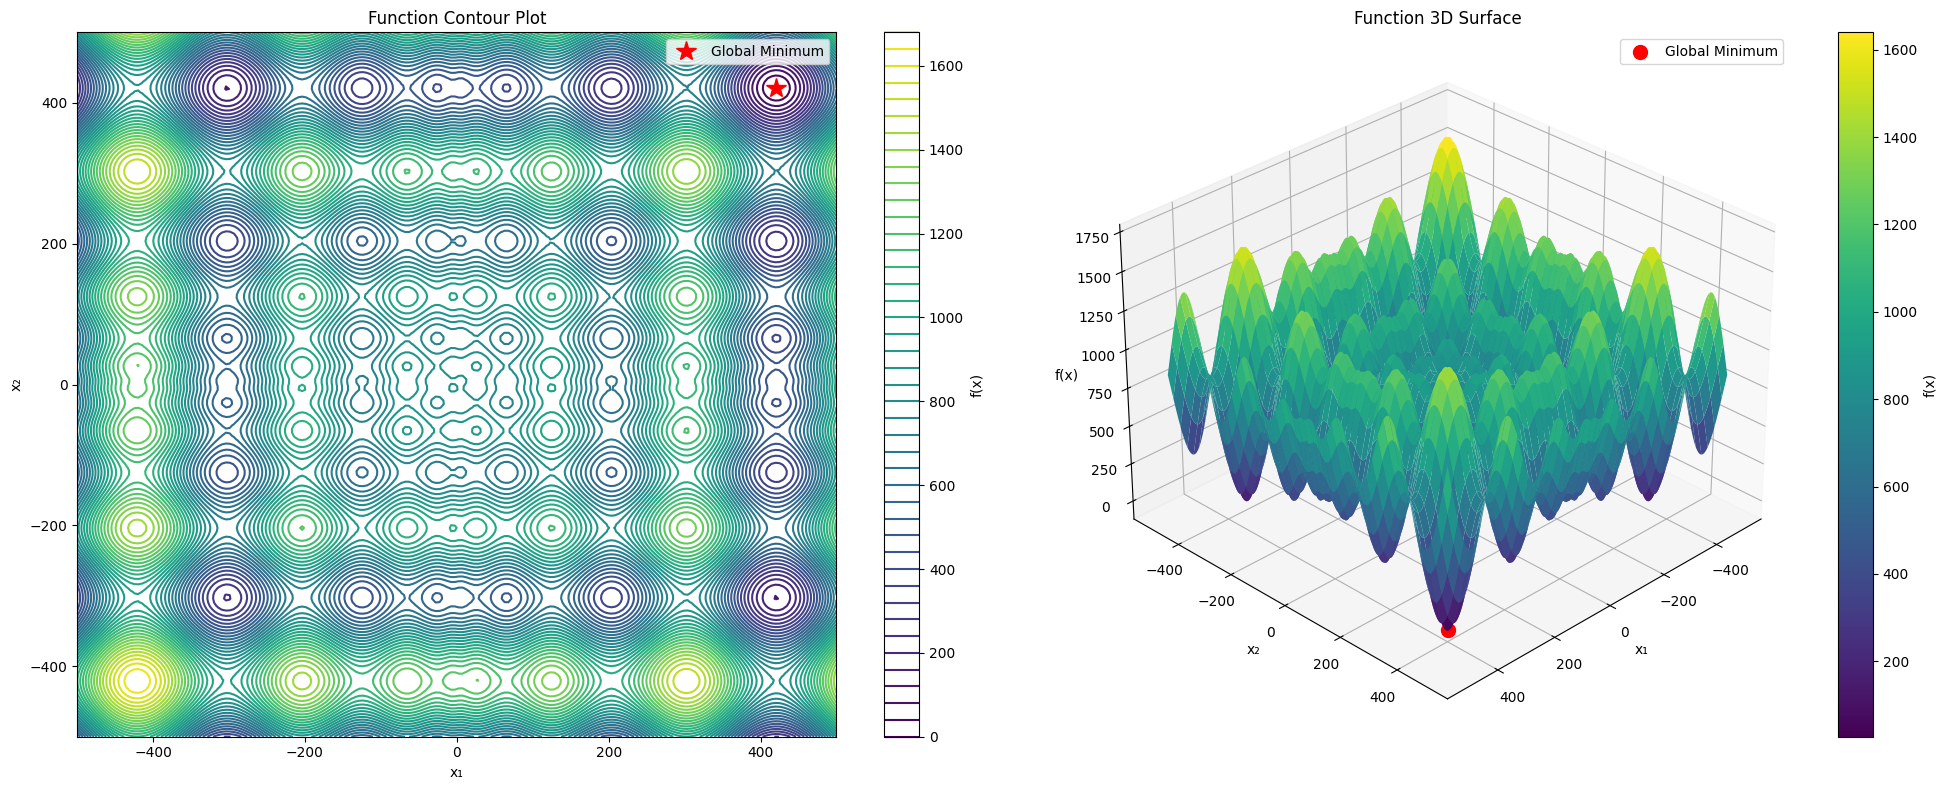

In [8]:
#The following code will plot the Schewel function, with the location of the known gloabal minimum
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid of points
x = np.linspace(search_range[0][0], search_range[0][1], 200)
y = np.linspace(search_range[1][0], search_range[1][1], 200)
X, Y = np.meshgrid(x, y)

# Calculate Z values
Z = np.zeros_like(X)
for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    Z[i,j] = func_to_optimize([X[i,j], Y[i,j]])

# Create figure with subplots
fig = plt.figure(figsize=(20, 8))

# 1. Contour Plot
ax1 = fig.add_subplot(121)
contour = ax1.contour(X, Y, Z, levels=50, cmap='viridis')
ax1.set_title('Function Contour Plot')
ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
plt.colorbar(contour, ax=ax1, label='f(x)')

# Mark global minimum
global_min = (420.9687, 420.9687)
ax1.plot(global_min[0], global_min[1], 'r*', markersize=15, label='Global Minimum')
ax1.legend()

# 2. 3D Surface Plot
ax2 = fig.add_subplot(122, projection='3d')
surface = ax2.plot_surface(X, Y, Z, cmap='viridis',
                      linewidth=0, antialiased=True)
ax2.set_title('Function 3D Surface')
ax2.set_xlabel('x₁')
ax2.set_ylabel('x₂')
ax2.set_zlabel('f(x)')
plt.colorbar(surface, ax=ax2, label='f(x)')

# Mark global minimum on 3D plot
z_min = func_to_optimize(global_min)
ax2.scatter(global_min[0], global_min[1], z_min,
        color='red', s=100, label='Global Minimum')
ax2.legend()

# Set a fixed view angle for the 3D plot
ax2.view_init(elev=30, azim=45)

# Adjust layout and display
plt.tight_layout()
plt.show()


Let's use simulated annealing to find the global minimum. In this case, default parameters will work. In other cases, we wil need to tweak parameters such as temperature. <br>

To understand how simulated anealing works, imagine you're trying to roll a ball to find the lowest point in a hilly landscape at night. You have two options:

1. Simply let the ball roll down wherever it is (like regular hill descent, used by scipy.optimize.minize)
2. Occasionally give the ball some random kicks to explore other parts of the landscape. <br>

The "temperature" in simulated annealing represents how hard you're willing to kick the ball:

High temperature (early in the search):

- Like kicking the ball very hard
- Allows exploration of very different areas
- Can escape local valleys by jumping over hills
- Accepts worse solutions more frequently


Low temperature (later in the search):

- Like giving tiny nudges to the ball
- Focuses on fine-tuning in the current area
- Less likely to leave a good valley once found
- Rarely accepts worse solutions



In [9]:
from scipy.optimize import dual_annealing

output = dual_annealing(func_to_optimize, bounds=search_range,
                        no_local_search=False)
print(output)

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 2.545524091601692e-05
       x: [ 4.210e+02  4.210e+02]
     nit: 1000
    nfev: 4049
    njev: 16
    nhev: 0


You can also try an evolutionary algorithm such as differential evolution to find the solution

In [10]:
from scipy.optimize import differential_evolution
output = differential_evolution(
        func_to_optimize,
        bounds=search_range,
        strategy='best1bin',
        popsize=20, #This is how many candidate solutions we explore in each iteration
        mutation=(0.5, 1), #This is similar to the random kicks on simulated annealing
    )
print(output)

             message: Optimization terminated successfully.
             success: True
                 fun: 2.5455735624291265e-05
                   x: [ 4.210e+02  4.210e+02]
                 nit: 31
                nfev: 1289
          population: [[ 4.210e+02  4.210e+02]
                       [ 4.210e+02  4.210e+02]
                       ...
                       [ 4.210e+02  4.210e+02]
                       [ 4.210e+02  4.210e+02]]
 population_energies: [ 2.546e-05  2.552e-05 ...  2.553e-05  2.555e-05]
                 jac: [ 5.684e-06 -1.137e-05]


The solution to this problem is

$f(x_1,x_2) \approx 0$
<br>
for
<br>
$(x_1,x_2) \approx (421, 421)$



In [11]:
func_to_optimize([421,421])

np.float64(0.0002719677113418584)